### [실습] moons 데이터셋

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=6, random_state=2, criterion='entropy')
forest.fit(X_train, y_train)

print("학습용:", forest.score(X_train, y_train))
print("검증용:", forest.score(X_test, y_test))

import numpy as np
idx = 0
result = []
for f in forest.estimators_:
    result.append(f.score(X_test, y_test))
    idx += 1
print(result)
print(max(result))
print(np.argmax(result))

학습용: 0.96
검증용: 0.92
[0.84, 0.88, 0.8, 0.92, 0.88, 0.8]
0.92
3


[Text(0.5909090909090909, 0.9166666666666666, 'X[1] <= 0.498\nentropy = 0.994\nsamples = 50\nvalue = [41, 34]'),
 Text(0.36363636363636365, 0.75, 'X[1] <= 0.206\nentropy = 0.712\nsamples = 30\nvalue = [8, 33]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[0] <= -0.588\nentropy = 0.503\nsamples = 21\nvalue = [3, 24]'),
 Text(0.09090909090909091, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [3, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'entropy = 0.0\nsamples = 20\nvalue = [0, 24]'),
 Text(0.5454545454545454, 0.5833333333333334, 'X[1] <= 0.468\nentropy = 0.94\nsamples = 9\nvalue = [5, 9]'),
 Text(0.45454545454545453, 0.4166666666666667, 'X[1] <= 0.348\nentropy = 0.991\nsamples = 7\nvalue = [5, 4]'),
 Text(0.36363636363636365, 0.25, 'X[0] <= 1.199\nentropy = 0.985\nsamples = 5\nvalue = [3, 4]'),
 Text(0.2727272727272727, 0.08333333333333333, 'entropy = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.45454545454545453, 0.08333333333333333, 'entropy = 0.0\nsamples = 

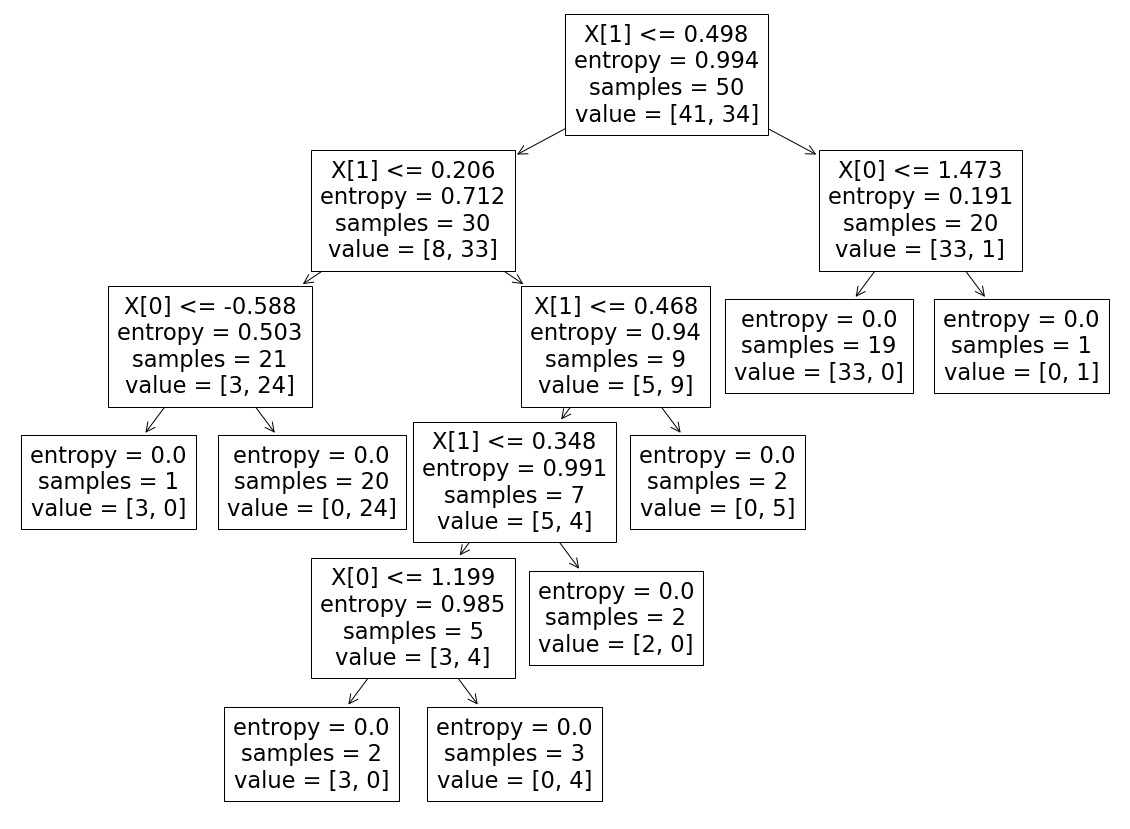

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import tree

plt.figure(figsize=(20, 15))
tree.plot_tree(forest.estimators_[3])

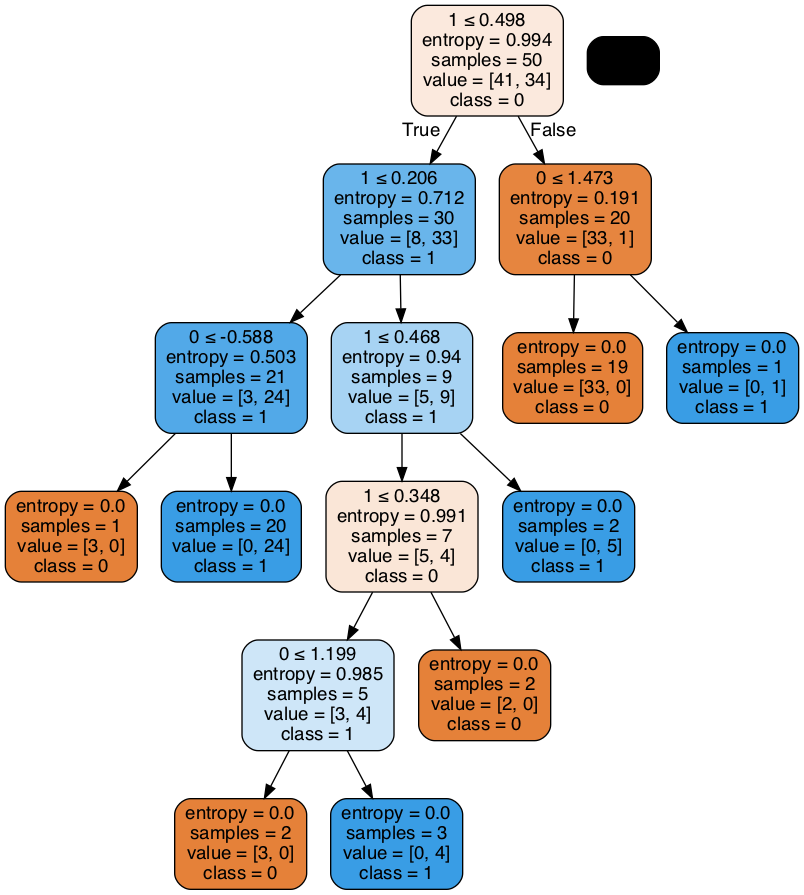

In [3]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image

dot_data = export_graphviz(forest.estimators_[3], out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

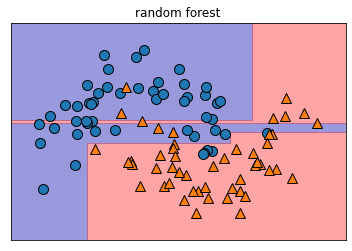

In [4]:
# np.ravel(다차원데이터) : 다차원데이터를 1차원 데이터로 변환
import mglearn
mglearn.plots.plot_2d_separator(forest.estimators_[3], X, fill=True, alpha=0.4)
plt.title("random forest")
#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)



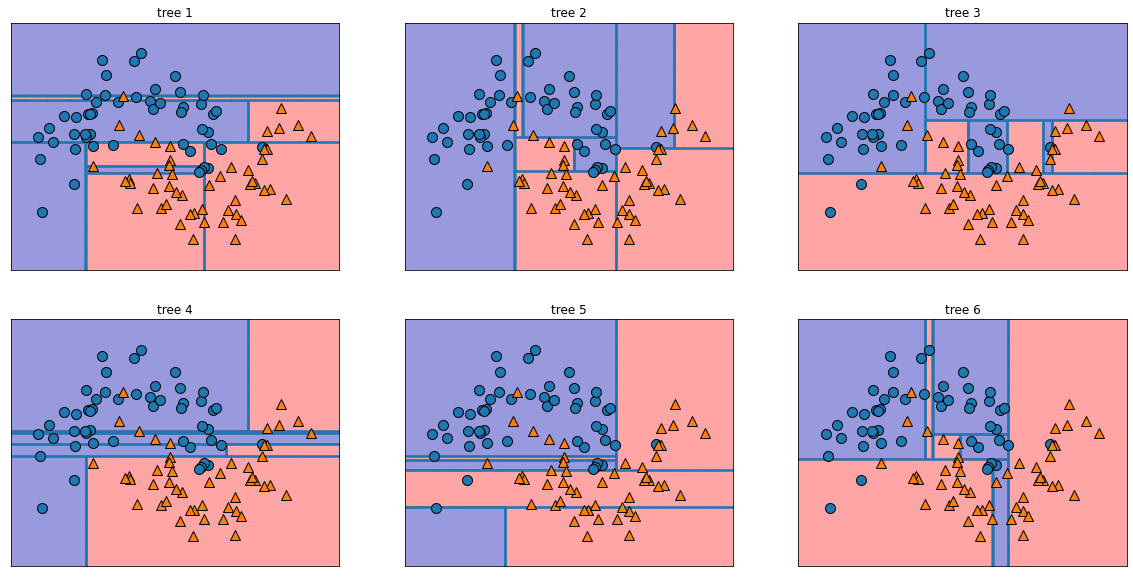

In [6]:
# ravel을 통해 1차원으로 만들어서 트리 갯수와 매핑시킴
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f'tree {i+1}')
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)